In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(u'iris.txt', sep=' ')
df.head()

,sl,sw,pl,pw,c
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sl    150 non-null float64
sw    150 non-null float64
pl    150 non-null float64
pw    150 non-null float64
c     150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


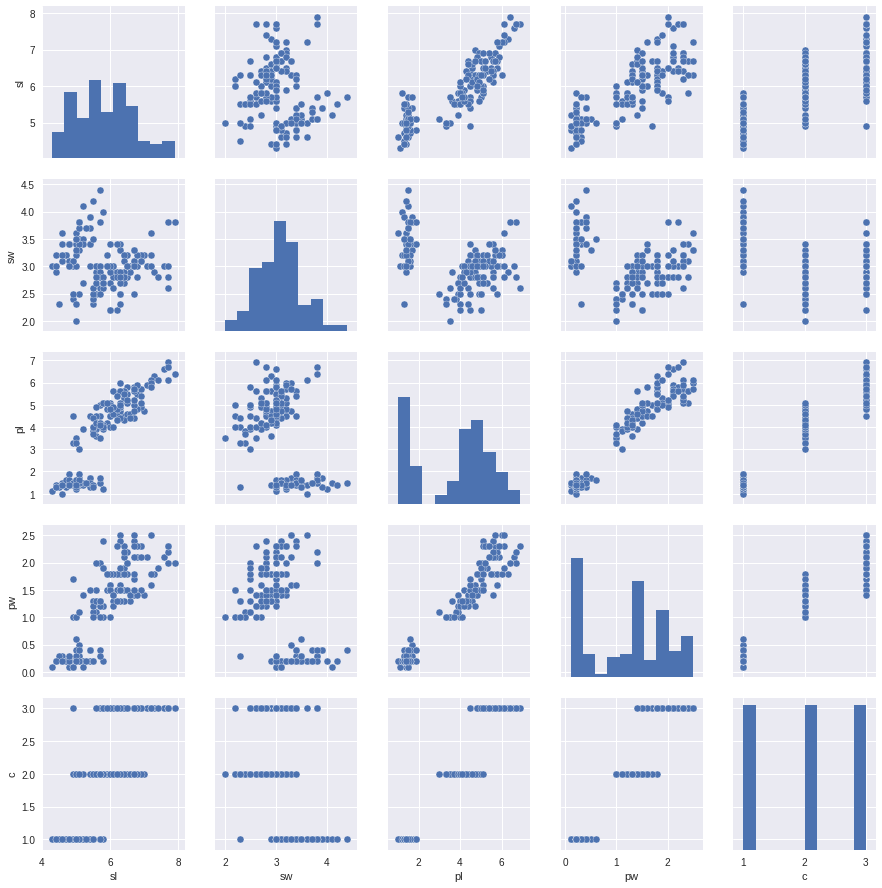

In [4]:
sns.pairplot(df)

In [5]:
X = df.drop('c',axis=1)
y = df['c']

In [6]:
from sklearn.cross_validation import train_test_split

/home/gokhanozg/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        19
          2       0.93      0.93      0.93        15
          3       0.94      0.94      0.94        16

avg / total       0.96      0.96      0.96        50



## Decision Tree works with 100% precision here. Now I will visualize it.

In [15]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[:4])
features

['sl', 'sw', 'pl', 'pw']

In [16]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)

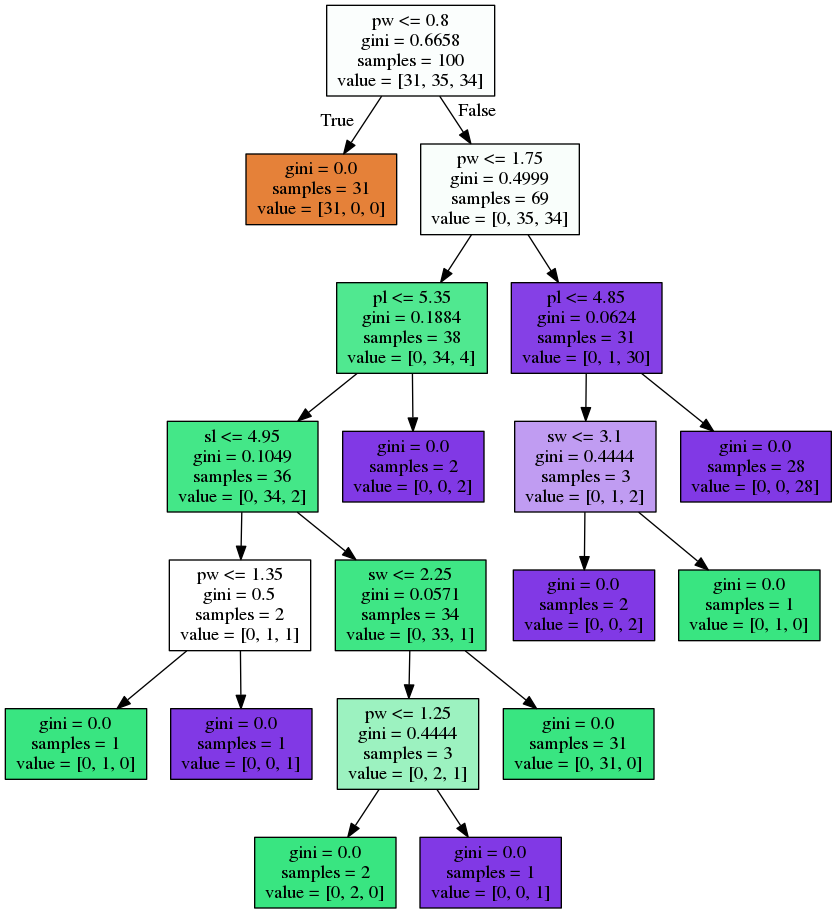

In [20]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Results:

1. With decision tree, the algorithm predicts correct class with 100% precision, it was 98.6% with knn algorithm

1. Decision tree enables visual representation of the algorithm which is better for human readability

1. knn algorithm requires all data to to predict the class of "next" input where as decision tree algorithm can be ported without having all data.